## Train a cvae for the handwritten digits simulation

In [1]:
# Copyright (C) 2018 Zhixian MA <zx@mazhixian.me>

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from cvae.cvae import cvae
from cvae.utils import utils

In [5]:
from cvae.configs import config_mnist
from cvae.configs import config_train

### Load mnist data

In [6]:
# Step1 load MNITST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True, validation_size=5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
cf = config_mnist
tr_cf = config_train

### Build the net and train

In [8]:
net = cvae(cf)
net.cvae_build()
# print the net structure
net.cvae_print()

Layer ID    Layer type    Layer shape
0 Input layer [None, 794]
1 FC layer 0 [None, 512]
2 BN layer 0 [None, 512]
3 FC layer 1 [None, 256]
4 BN layer 1 [None, 256]
5 En_mu [None, 16]
6 En_sigma [None, 16]
7 z [None, 16]
8 FC layer 1 [None, 256]
9 BN layer 1 [None, 256]
10 FC layer 0 [None, 512]
11 BN layer 0 [None, 512]
12 Output layer [None, 784]


In [9]:
# train the net
net.cvae_train_mnist(mnist=mnist, train_configs=tr_cf)

[2018-05-12: 12:57:28]: Epochs    Trn_loss_recon    Val_loss_recon    Trn_loss_latent    Val_loss_latent
[2018-05-12: 12:57:29]:      0         306.65951          83.08424           24.63705            2.67869
[2018-05-12: 12:58:06]:   1000          23.97300          22.92955            7.54816            7.67208
[2018-05-12: 12:58:42]:   2000          21.82877          21.60120            7.46204            7.57356
[2018-05-12: 12:59:19]:   3000          21.52530          20.13616            7.46815            7.53047
[2018-05-12: 12:59:56]:   4000          21.32673          20.23856            7.56534            7.51867
[2018-05-12: 13:00:33]:   5000          21.08933          20.27871            7.60372            7.64924
[2018-05-12: 13:01:09]:   6000          21.00674          19.80265            7.44049            7.43661
[2018-05-12: 13:01:46]:   7000          21.10521          20.19068            7.56902            7.65754
[2018-05-12: 13:02:23]:   8000          21.67966       

### Test the net

In [10]:
n_examples = 10
img_test, img_labels = mnist.test.next_batch(n_examples)

In [11]:
img_est = net.sess.run(
    net.outputs_de, 
    feed_dict={net.inputs: img_test, 
               net.outputs: img_test,
               net.conditions: img_labels,
               net.is_training: False,
               net.keep_prob: 0.5
               })

/home/mzx/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


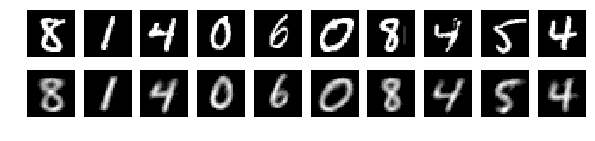

In [12]:
import numpy as np
fig, axs = plt.subplots(2, n_examples, figsize=(n_examples, 2))
for example_i in range(n_examples):
    # original
    axs[0][example_i].imshow(np.reshape(img_test[example_i, :], (28, 28)), cmap='gray')
    axs[0][example_i].axis('off')
    # reconstructed
    axs[1][example_i].imshow(np.reshape(img_est[example_i, :], (28, 28)), cmap='gray')
    axs[1][example_i].axis('off')

fig.show()
plt.draw()

### Save the net

In [13]:
import os
foldname = "./cvae_mnist"
name = "cvae.pkl"
netname = "model_cvae.ckpt"
namepath = os.path.join(foldname, name)
netpath = os.path.join(foldname, netname)
savedict = {'netpath': netpath}
if os.path.exists(foldname):
    os.system("rm -r %s" % (foldname))
os.mkdir(foldname)
utils.save_net(sess=net.sess,
               namepath=namepath,
               netpath=netpath,
               savedict=savedict)